In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("hearing_test.csv")

In [3]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=101,)

In [6]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model=LogisticRegression()

In [9]:
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [10]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [11]:
y_pred=model.predict(scaled_X_test)

In [12]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [13]:
y_prob=model.predict_proba(scaled_X_test)

In [14]:
y_prob # 1st value probability of belonging to class 0 and 2nd is prob of belonging to 1

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

# calculating error metrics

In [15]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
accuracy_score(y_test,y_pred) # 93% accuracy

0.93

In [18]:
confusion_matrix(y_test,y_pred) # gives TP FN FP TN

array([[172,  21],
       [ 14, 293]], dtype=int64)

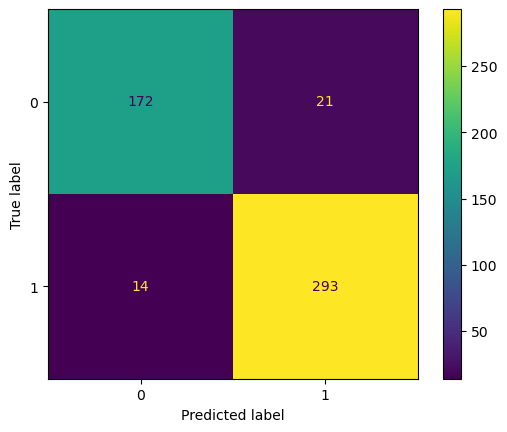

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay 
ConfusionMatrixDisplay.from_estimator(model,scaled_X_test,y_test) # plots a graph

* if graph has distinct colors for FN and FP as compared to TN TP then model is performing reasonably well

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [37]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9331210191082803
0.9543973941368078
0.9436392914653785


# ROC curves

In [28]:
from sklearn.metrics import RocCurveDisplay

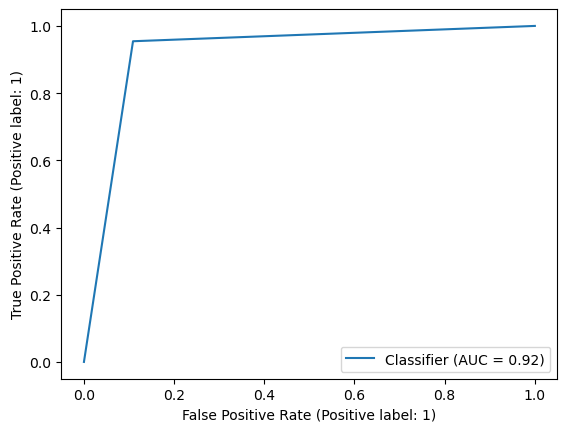

In [38]:
RocCurveDisplay.from_predictions(y_test,y_pred)

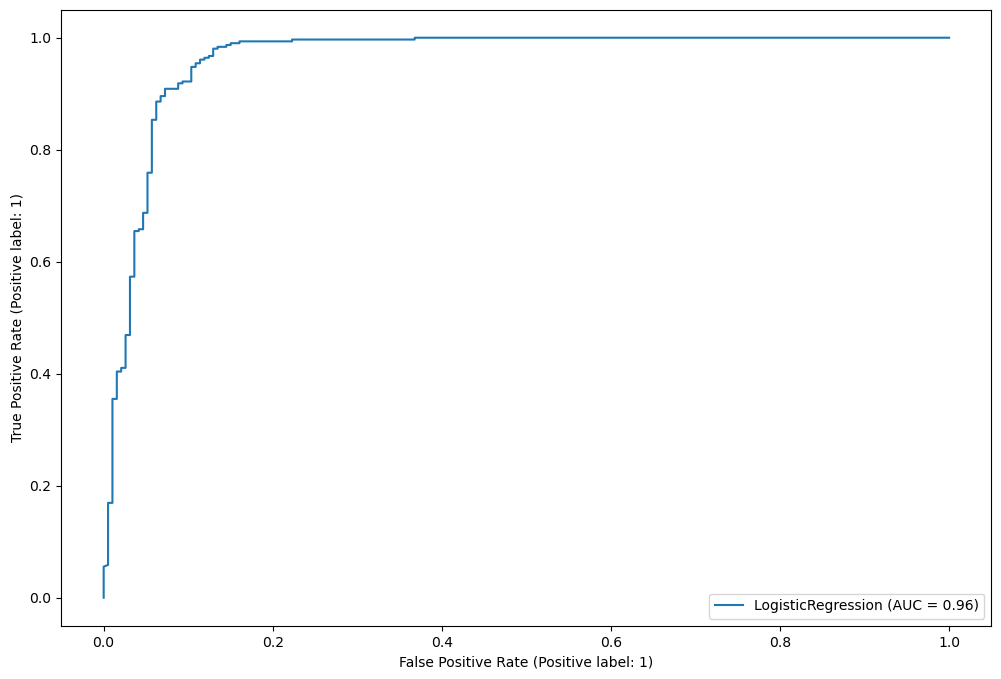

In [43]:
fig,ax=plt.subplots(figsize=(12,8))
RocCurveDisplay.from_estimator(model,scaled_X_test,y_test,ax=ax)

In [39]:
model.predict(scaled_X_test)[0]

1

In [40]:
y_test[0]

1

In [42]:
model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

* as probabilty of belonging to class 1 is 97.6% our model predicts it as 1 and the actual value is also 1 so acc. to all the metrics seen we can declare it as a good model